In [1]:
import pandas as pd
import numpy as np
import joblib
import folium
import re
import geopandas as gpd

In [2]:
from server_configuration.helpers import modelling
modelling_ = modelling("data_right_price/data_localisee/")
X_train, X_test, Y_train, Y_test, scaler = modelling_.preprocessing_and_splitting()

In [15]:
X_train.shape

(1516673, 12)

In [4]:
xgboost = modelling_.training(X_train, Y_train, save=True, pkl_file_path="server_configuration/saved_model_bis.pkl")

In [27]:
y_pred = modelling_.predict(xgboost, X_test)
modelling_.print_score(modelling_.min_max_rescale(Y_test.values, scaler), modelling_.min_max_rescale(y_pred, scaler))

R²: 0.7804180191429283
RMSE: 99213.87671839706
MSE: 9843393333.49329
MAE: 58859.28983356333


In [9]:
reg = modelling_.load_model("server_configuration/saved_model_bis.pkl")
y_pred_2 = modelling_.predict(reg, X_test)
modelling_.print_score(modelling_.min_max_rescale(Y_test.values, scaler), modelling_.min_max_rescale(y_pred_2, scaler))

R²: 0.7804180191429283
RMSE: 99213.87671839706
MSE: 9843393333.49329
MAE: 58859.28983356333


In [23]:
X_train.head()#.values

,anneemut,moismut,coddep,vefa,sterr,nblocdep,latitude,longitude,nb_accomodations,surf,arro,nb_rooms
741653,NaN,NaN,NaN,NaN,929.0,0.0,48.961520,1.799764,1.0,67.0,0,3.0
2452127,2018.0,6.0,78.0,0.0,0.0,1.0,48.651292,1.821414,1.0,59.0,0,3.0
1483320,NaN,NaN,NaN,NaN,0.0,0.0,49.037347,2.374348,1.0,50.0,0,2.0
2024823,2019.0,7.0,95.0,0.0,1005.0,0.0,49.046331,2.316459,1.0,97.0,0,5.0
371929,NaN,NaN,NaN,NaN,0.0,0.0,48.846035,2.329228,1.0,115.0,6,5.0


In [86]:
lat_long = pd.DataFrame([[1, 48.8637, 2.332],
[2, 48.8676, 2.344],
[3, 48.8635, 2.3591],
[4, 48.8534, 2.3583],
[5, 48.8435, 2.3518],
[6, 48.8505, 2.3322],
[7, 48.8543, 2.3134], 
[8, 48.8742, 2.3111],
[9, 48.8783, 2.337],
[10, 48.8755, 2.3579],
[11, 48.858, 2.3812],
[12, 48.8408, 2.3882],
[13, 48.8322, 2.3556],
[14, 48.833, 2.3269],
[15, 48.8413, 2.3003],
[16, 48.8531, 2.2488],
[17, 48.8822, 2.3078],
[18, 48.8922, 2.3444],
[19, 48.8824, 2.3818],
[20, 48.8651, 2.399],
[75, 48.8786, 2.3642],
[77, 48.5421, 2.6554],
[78, 48.8014, 2.1301],
[91, 48.6298, 2.4418],
[92, 48.8924, 2.2153],
[93, 48.91, 2.4222],
[94, 48.7904, 2.4556],
[95, 49.0332, 2.0547]
], columns=['location', 'latitude', 'longitude'])

In [88]:
lat_long = pd.DataFrame([[1, 48.8637, 2.332],
                        [2, 48.8676, 2.344],
                        [3, 48.8635, 2.3591],
                        [4, 48.8534, 2.3583],
                        [5, 48.8435, 2.3518],
                        [6, 48.8505, 2.3322],
                        [7, 48.8543, 2.3134], 
                        [8, 48.8742, 2.3111],
                        [9, 48.8783, 2.337],
                        [10, 48.8755, 2.3579],
                        [11, 48.858, 2.3812],
                        [12, 48.8408, 2.3882],
                        [13, 48.8322, 2.3556],
                        [14, 48.833, 2.3269],
                        [15, 48.8413, 2.3003],
                        [16, 48.8531, 2.2488],
                        [17, 48.8822, 2.3078],
                        [18, 48.8922, 2.3444],
                        [19, 48.8824, 2.3818],
                        [20, 48.8651, 2.399],
                        [75, 48.8786, 2.3642],
                        [77, 48.5421, 2.6554],
                        [78, 48.8014, 2.1301],
                        [91, 48.6298, 2.4418],
                        [92, 48.8924, 2.2153],
                        [93, 48.91, 2.4222],
                        [94, 48.7904, 2.4556],
                        [95, 49.0332, 2.0547]], 
                        columns=['location', 'latitude', 'longitude']).set_index('location')

In [93]:
arro = 30
dept = 75
int(str(arro)[-2:]) if int(str(arro)[-2:]) <= 20 else dept

75

In [95]:
lat_long.at[int(str(arro)[-2:]) if int(str(arro)[-2:]) <= 20 else dept, 'longitude']

2.3642

In [79]:
year = 2022
month = 12
dept = 75
vefa = 0
sterr = 0
surface = 50
arro = 18
nb_rooms=2


df_to_predict = pd.DataFrame([[year, month, dept, vefa, sterr, 0.,  48.96152015,   1.79976425,
          1., surface, arro, nb_rooms]], columns=X_train.columns)

modelling_.min_max_rescale(modelling_.predict(reg, df_to_predict), scaler)[0][0]

251581.44

In [22]:
X_train.columns

Index(['anneemut', 'moismut', 'coddep', 'vefa', 'sterr', 'nblocdep',
       'latitude', 'longitude', 'nb_accomodations', 'surf', 'arro',
       'nb_rooms'],
      dtype='object')

In [72]:
# joblib.dump(scaler, "saved_scaler.pkl")

In [73]:
IDF = pd.read_csv("data_right_price/data_localisee/mutations_IDF_train_localized.csv", low_memory=False)

In [74]:
X_test_merged_2 = pd.merge(X_test, IDF, left_index=True, right_index=True)

In [91]:
predicted = pd.DataFrame(modelling_.min_max_rescale(Y_test.values, scaler), columns=['valeurfonc'], index=X_test.index)

In [93]:
predicted['pred_valeurfonc'] = modelling_.min_max_rescale(y_pred, scaler)

In [94]:
X_test_merged_again = pd.merge(X_test_merged_2, predicted, left_index=True, right_index=True)

In [113]:
X_test_merged_again[[i for i in X_test_merged_again.columns if i[-1:] == 'x' or i[-1:] == 'y']].head()

,nblot_x,sterr_x,nbvolmut_x,nblocmut_x,nblocmai_x,nblocapt_x,nblocdep_x,nblocact_x,latitude_x,longitude_x,...,nblocmut_y,nblocmai_y,nblocapt_y,nblocdep_y,nblocact_y,latitude_y,longitude_y,day,weekday,valeurfonc_y
344303,0.0,197.0,0.0,1.0,1.0,0.0,0.0,0.0,48.664823,2.579477,...,1.0,1.0,0.0,0.0,0.0,48.664823,2.579477,23,3,250000.0
117585,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,48.878423,2.293709,...,1.0,0.0,1.0,0.0,0.0,48.878423,2.293709,30,0,400000.0
559895,0.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,48.839498,1.834756,...,0.0,0.0,0.0,0.0,0.0,48.839498,1.834756,17,1,115000.0
1207085,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.960304,2.283801,...,0.0,0.0,0.0,0.0,0.0,48.960304,2.283801,4,3,185504.0
53854,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,48.865387,2.366866,...,1.0,0.0,1.0,0.0,0.0,48.865387,2.366866,18,4,229000.0


In [26]:
X_test_merged_again.columns

NameError: name 'X_test_merged_again' is not defined

In [117]:
[i for i in X_test_merged_again.columns if i[-1:] == 'x' or i[-1:] == 'y']

['nblot_x',
 'sterr_x',
 'nbvolmut_x',
 'nblocmut_x',
 'nblocmai_x',
 'nblocapt_x',
 'nblocdep_x',
 'nblocact_x',
 'latitude_x',
 'longitude_x',
 'valeurfonc_x',
 'nblot_y',
 'sterr_y',
 'nbvolmut_y',
 'nblocmut_y',
 'nblocmai_y',
 'nblocapt_y',
 'nblocdep_y',
 'nblocact_y',
 'latitude_y',
 'longitude_y',
 'day',
 'weekday',
 'valeurfonc_y']

In [114]:
X_test_merged_again.drop([i for i in X_test_merged_again.columns if i[-1:] == 'y'], axis=1)

,anneemut,moismut,nblot_x,sterr_x,nbvolmut_x,nblocmut_x,nblocmai_x,nblocapt_x,nblocdep_x,nblocact_x,...,smai3pp,smai4pp,smai5pp,codtypbien,libtypbien,Dept,month,year,day_month,pred_valeurfonc
344303,NaN,NaN,0.0,197.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,77.0,0.0,111.0,UNE MAISON,77,8,2018,NaN,232494.156250
117585,NaN,NaN,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,121.0,UN APPARTEMENT,75,6,2014,NaN,372414.281250
559895,NaN,NaN,0.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,229.0,TERRAIN ARTIFICIALISE MIXTE,78,3,2015,NaN,178653.421875
1207085,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,101.0,BATI - INDETERMINE : Vefa sans descriptif,95,1,2018,NaN,210769.031250
53854,NaN,NaN,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,121.0,UN APPARTEMENT,75,1,2019,NaN,259747.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263726,NaN,NaN,0.0,3340.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,180.0,111.0,UNE MAISON,77,2,2019,NaN,355567.500000
1027143,NaN,NaN,0.0,60.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,152.0,BATI MIXTE - LOGEMENT/ACTIVITE,94,12,2020,NaN,420250.062500
100066,NaN,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,121.0,UN APPARTEMENT,75,9,2019,NaN,140242.156250
409148,NaN,NaN,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,121.0,UN APPARTEMENT,78,9,2018,NaN,252534.859375


In [97]:
# X_test_merged_again.to_csv('data_right_price/data_localisee/predictions.csv')

In [75]:
def plot_prediction_map(geo_df, dept=None, insee=None, section=None, type_of_property=None, min_surface=None, max_surface=None, luxury=False):
    
    """
    Plots a map showing the locations of properties based on the given parameters

    Args:
    geo_df (geopandas.geodataframe.GeoDataFrame): A dataframe containing property information.
    dept (int, optional): Department number. Defaults to None.
    insee (int, optional): Municipality code. Defaults to None.
    section (str, optional): Property section. Defaults to None.
    type_of_property (str, optional): Type of property. Defaults to None.
    min_surface (int, optional): Minimum surface of property to filter data by, default is None
    max_surface (int, optional): Maximum surface of property to filter data by, default is None

    Returns:
    None: If no data meets criteria or if municipality is not in selected department
    folium.Map: Interactive map of filtered properties with markers showing property details
    """

    
    if dept is not None and insee is not None:
        if np.floor(insee/1000) != dept:
            print("The municipality you chose is not in the department you chose. Please change either the department or the municipality.")
            return None
                
    if dept is not None: 
        geo_zone = geo_df[geo_df['Dept'] == float(dept)]
    else:
        geo_zone = geo_df

    if insee is not None: 
        geo_zone = geo_zone[geo_zone['l_codinsee'].apply(lambda x: str(insee) in re.findall(r'[0-9]+', x))]

    if section is not None:
        geo_zone = geo_zone[geo_zone['l_section'].apply(lambda x: str(section) in re.findall(r'[0-9-A-Z]+', x))]
    
    if type_of_property is not None:
        geo_zone = geo_zone[geo_zone['libtypbien'] == type_of_property]
        
    if min_surface is not None and max_surface is not None:
        if min_surface <= max_surface:
            geo_zone = geo_zone[(geo_zone['sbati'] >= min_surface) & (geo_zone['sbati'] <= max_surface)]
        else:
            print("The maximum surface cannot be lower than the minimum surface. Please change these creteria.")
            return None
    elif max_surface is None and min_surface is not None:
        geo_zone = geo_zone[geo_zone['sbati'] >= min_surface]
    elif max_surface is not None and min_surface is None:
        geo_zone = geo_zone[geo_zone['sbati'] <= max_surface]
        
    if luxury:
        geo_zone = geo_zone[geo_zone['pred_valeurfonc'] > 0].sort_values('pred_valeurfonc')[-3:]
    else:
        geo_zone = geo_zone[geo_zone['pred_valeurfonc'] > 0].sort_values('pred_valeurfonc')[:3]
    

        
    geo_df_list = [(i[0], i[1]) for i in geo_zone[['latitude_x', 'longitude_x']].values]
    if len(geo_df_list) == 0:
        print("There are no mutation that meet the criteria you have selected. Please change these creteria.")
        return None    
    
    
    map = folium.Map(location=[geo_zone.latitude_x.median(), geo_zone.longitude_x.median()], tiles="OpenStreetMap")
    if luxury:
        for i, coordinates in enumerate(geo_df_list):
            map.add_child(
                folium.Marker(
                    icon=folium.Icon(color="red", icon="info-sign"),
                    location=coordinates,
                    popup=
                        "Nature de la mutation: " + str(geo_zone.libnatmut.values[i]) + "<br>" + "<br>"
                        f"Valeur foncière estimée: {str(round(geo_zone.pred_valeurfonc.values[i], 2))}€" + "<br>" + "<br>"
                        "Type de bien: " + str(geo_zone.libtypbien.values[i]) + "<br>" + "<br>"
                        f"Surface du bien: {str(geo_zone.sbati.values[i])} m^2" + "<br>" + "<br>"
                        "CODE INSEE: " + ', '.join(re.findall(r'[0-9]+', geo_zone.l_codinsee.values[i])) + "<br>" + "<br>"
                        "Section: " + ', '.join(re.findall(r'[0-9A-Z]+', geo_zone.l_section.values[i])) + "<br>" # + "<br>"
                        #+ "Coordinates: " + str(geo_df_list[i]),
                )
            )
    else:
        for i, coordinates in enumerate(geo_df_list):
            map.add_child(
                folium.Marker(
                    icon=folium.Icon(color="blue", icon="info-sign"),
                    location=coordinates,
                    popup=
                        "Nature de la mutation: " + str(geo_zone.libnatmut.values[i]) + "<br>" + "<br>"
                        f"Valeur foncière estimée: {str(round(geo_zone.pred_valeurfonc.values[i], 2))}€" + "<br>" + "<br>"
                        "Type de bien: " + str(geo_zone.libtypbien.values[i]) + "<br>" + "<br>"
                        f"Surface du bien: {str(geo_zone.sbati.values[i])} m^2" + "<br>" + "<br>"
                        "CODE INSEE: " + ', '.join(re.findall(r'[0-9]+', geo_zone.l_codinsee.values[i])) + "<br>" + "<br>"
                        "Section: " + ', '.join(re.findall(r'[0-9A-Z]+', geo_zone.l_section.values[i])) + "<br>" # + "<br>"
                        #+ "Coordinates: " + str(geo_df_list[i]),
                )
            )

    sw = geo_zone[['latitude_x', 'longitude_x']].min().values.tolist()
    ne = geo_zone[['latitude_x', 'longitude_x']].max().values.tolist()

    map.fit_bounds([sw, ne])
    
    return map

In [76]:
X_test_merged_again_sample = pd.read_csv('data_right_price/data_localisee/sample_predictions.csv')
geo_X_test_merged_again_sample = gpd.GeoDataFrame(
    X_test_merged_again_sample, geometry=gpd.points_from_xy(X_test_merged_again_sample.longitude_x, 
                                                            X_test_merged_again_sample.latitude_x))

In [77]:
plot_prediction_map(geo_X_test_merged_again_sample, dept=78, insee=78372, section=None, type_of_property=None, min_surface=None, max_surface=None, luxury=True)

In [27]:
from server_configuration.helpers import plotting_functions

import pandas as pd
import geopandas as gpd

In [28]:
IDF_sample = pd.read_csv('data_right_price/data_localisee/sample_mutations_IDF_train_localized.csv')

geo_IDF_sample = gpd.GeoDataFrame(
    IDF_sample, geometry=gpd.points_from_xy(IDF_sample.longitude, IDF_sample.latitude))


In [29]:
plotting_functions(min_year=2014, max_year=2014).plot_map(geo_IDF_sample)

In [30]:
# IDF = pd.read_csv('server_configuration/data_right_price/data_localisee/mutations_IDF_train_localized.csv', index_col='Unnamed: 0', low_memory=True)
# IDF_sample_100000 = IDF.sample(100000, random_state=123)

In [31]:
IDF_sample_100000 = pd.read_csv('server_configuration/data_right_price/data_localisee/sample_100000_mutations_IDF_train_localized.csv')

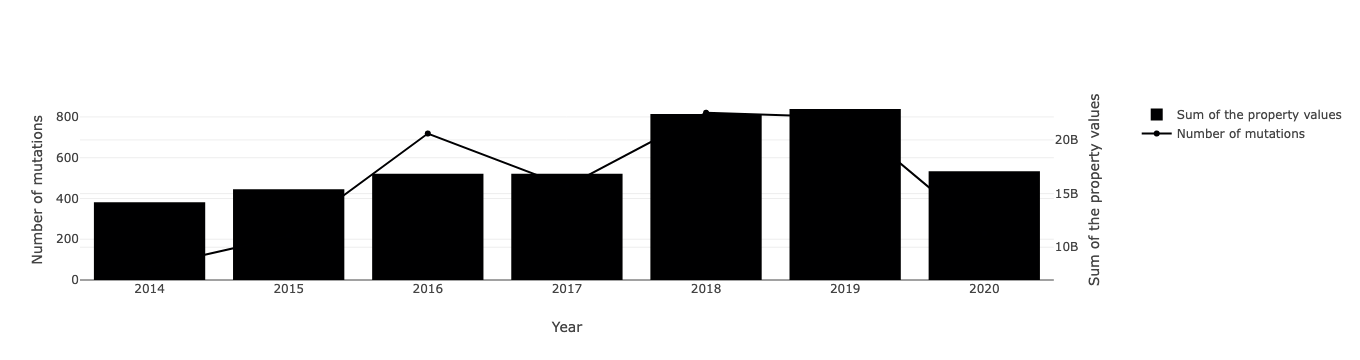

In [32]:
fig = plotting_functions(min_value=6500000).plot_yearly_figures(IDF_sample_100000)
fig.show()